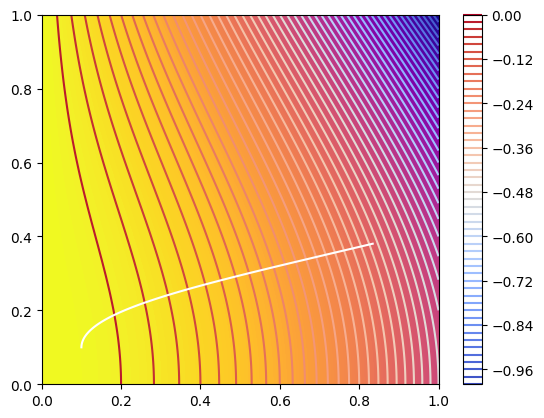

In [93]:
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint
import numpy as np

x, y = sp.symbols('x y')

Ex=(x+y)

Ey=(y*x)

#Potential calculation:
def V(x,y):

    f = sp.Function('f')(y)

    V=-sp.integrate(Ex,x)
    V1=V+f

    dVdy=-sp.diff(V1,y)

    f_eq=sp.Eq(dVdy,Ey)

    f1=sp.solve(f_eq,sp.Derivative(f, y))[0]

    f_func = sp.integrate(f1, y)

    V2=V+f_func



    return V2

V3=V(x,y)

V31=sp.lambdify((x,y),V3,"numpy")

Ex1=sp.lambdify((x,y),Ex,"numpy")
Ey1=sp.lambdify((x,y),Ey,"numpy")




#Plotting:
x=np.linspace(0,1,100)
y=np.linspace(0,1,100)


X,Y=np.meshgrid(x,y)



#Particle Dynamics:

t=np.linspace(0,2,100)

q=1 #charge of particle 
m=1 #mass of particle

def dynamics(state,t):
    x,y,vx,vy=state

    ax=(q/m)*Ex1(x,y)
    ay=(q/m)*Ey1(x,y)

    return [vx,vy,ax,ay]

state0=[0.1,0.1,0.001,0.1]

sol=odeint(dynamics,state0,t)

x1,y1,vx1,vy1=sol.T

#Potential curve:
plt.contourf(x,y,V31(X,Y),levels=200,cmap="plasma")
plt.contour(x,y,V31(X,Y),levels=60,cmap="coolwarm")

#Particle curve:
plt.plot(x1,y1,color="white")
plt.colorbar()



In [94]:
sol.T

array([[1.00000000e-01, 1.00061163e-01, 1.00204784e-01, 1.00431781e-01,
        1.00743063e-01, 1.01139586e-01, 1.01622345e-01, 1.02192371e-01,
        1.02850732e-01, 1.03598537e-01, 1.04436932e-01, 1.05367100e-01,
        1.06390265e-01, 1.07507690e-01, 1.08720681e-01, 1.10030584e-01,
        1.11438786e-01, 1.12946719e-01, 1.14555855e-01, 1.16267710e-01,
        1.18083845e-01, 1.20005869e-01, 1.22035435e-01, 1.24174244e-01,
        1.26424043e-01, 1.28786628e-01, 1.31263843e-01, 1.33857584e-01,
        1.36569795e-01, 1.39402477e-01, 1.42357679e-01, 1.45437504e-01,
        1.48644112e-01, 1.51979718e-01, 1.55446594e-01, 1.59047069e-01,
        1.62783530e-01, 1.66658428e-01, 1.70674272e-01, 1.74833634e-01,
        1.79139150e-01, 1.83593521e-01, 1.88199516e-01, 1.92959968e-01,
        1.97877780e-01, 2.02955928e-01, 2.08197457e-01, 2.13605487e-01,
        2.19183213e-01, 2.24933906e-01, 2.30860916e-01, 2.36967671e-01,
        2.43257680e-01, 2.49734538e-01, 2.56401922e-01, 2.632635